## Data Exploration 1

In this assignment, you'll continue working with the U.S. Education Dataset from Kaggle. The data gives detailed state level information on the several facets of the state of education on an annual basis. To learn more about the data and the column descriptions, you can view the Kaggle link above. You should access the data from the Thinkful database. Here's the credentials you can use to connect to the database:

Don't forget to apply the most suitable missing value filling techniques you applied in the previous checkpoint to the data. You're supposed to provide your answers to the following questions after you handled the missing values.

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

import seaborn as sns
from sqlalchemy import create_engine
import warnings
pd.set_option('display.max_columns', None)

warnings.filterwarnings('ignore')

In [3]:
# read in us education data 
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

education_df = pd.read_sql_query('select * from useducation',con=engine)

# no need for an open connection, 
# as we're only doing a single query
engine.dispose()

# fill in nan values
for col in education_df.columns[3:]:
    education_df.loc[:, col] = education_df.loc[:, col].fillna(education_df.loc[:, col].mean())

In [4]:
education_df.shape

(1492, 25)

In [5]:
education_df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,915930.820993,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,263.661132
1,1992_ALASKA,ALASKA,1992,915930.820993,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,234.768293,278.414711,218.866154,258.859712
2,1992_ARIZONA,ARIZONA,1992,915930.820993,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,915930.820993,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,915930.820993,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,263.661132


### 1. Derive the descriptive statistics of the data and discuss the points you find remarkable.

In [10]:
pd.options.display.float_format = '{:,.0f}'.format

# descriptive statistics for continuous variables
education_df.describe()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,"1,492","1,492","1,492","1,492","1,492","1,492","1,492","1,492","1,492","1,492","1,492","1,492","1,492","1,492","1,492","1,492","1,492","1,492","1,492","1,492","1,492","1,492","1,492"
mean,"2,004","915,931","9,092,082","766,372","4,216,553","4,109,157","9,196,681","4,762,966","2,680,331","429,205","902,769","17,602","63,747","64,539","64,271","54,269","519,214","247,071","802,442",235,278,219,264
std,7,"966,773","10,878,184","1,060,702","5,133,895","5,078,230","11,093,928","5,828,468","3,105,812","484,683","1,229,564","28,221","76,573","76,685","75,364","64,838","614,713","293,877","912,652",6,6,5,4
min,"1,992","43,866","465,650","31,020",0,"22,093","481,665","265,549","139,963","11,541","12,708",0,544,633,437,311,"4,878","1,808","7,254",187,233,179,236
25%,"1,998","315,094","2,546,261","217,020","1,356,434","944,796","2,523,968","1,343,611","767,369","135,428","216,340","2,449","14,016","15,196","15,683","13,437","121,152","59,198","229,358",235,278,219,264
50%,"2,004","820,414","6,359,310","516,741","3,127,639","2,697,257","6,520,224","3,358,142","1,913,844","367,234","648,218","10,505","48,897","49,884","49,571","39,566","401,586","181,701","647,326",235,278,219,264
75%,"2,011","921,178","9,276,958","766,372","4,269,811","4,109,157","9,434,922","4,938,820","2,795,888","456,892","902,769","19,149","70,373","71,814","72,131","64,616","574,912","282,539","872,422",235,278,219,264
max,"2,017","6,307,022","89,217,262","9,990,221","50,904,567","36,105,265","85,320,133","43,964,520","26,058,021","3,995,951","10,223,657","250,911","530,531","493,415","500,143","498,403","3,929,869","2,013,687","5,944,746",253,301,237,280


1. one state has an education budget of zero
1. groupings of colums have similarities
 - "Grades_" columns
 - "Avg_math_" columns



In [8]:
# descriptive statistics for categorical variables
education_df.describe(include=['O'])

,PRIMARY_KEY,STATE
count,1492,1492
unique,1487,80
top,2008_VIRGINIA,DISTRICT_OF_COLUMBIA
freq,3,29


1. why are there 80 unique states, shouldn't that be no bigger than 50?
1. what does frequency represent here?

### 2. Choose a state (e.g. California) and draw a line graph of its total revenues and total expenditures along the years. How do these 2 variables evolve during the years? Try to explain the peaks and troughs with some state-wise news and information around those dates.

In [17]:
# identify only Arizona data for revenue and expense
education_df.loc[education_df.STATE == 'ARIZONA', ['YEAR', 'TOTAL_REVENUE', 'TOTAL_EXPENDITURE']].head()

,YEAR,TOTAL_REVENUE,TOTAL_EXPENDITURE
2,1992,"3,258,079","3,401,580"
54,1993,"3,427,976","3,623,946"
106,1994,"3,566,586","3,803,379"
159,1995,"3,815,218","4,056,279"
211,1996,"4,143,304","4,391,555"


In [23]:
# groupby year and compute the sum of revenue and expense
year_over_year = education_df.loc[education_df.STATE == 'ARIZONA', ['YEAR', 'TOTAL_REVENUE', 'TOTAL_EXPENDITURE']] \
    .groupby('YEAR').sum()

In [24]:
year_over_year.head()

,TOTAL_REVENUE,TOTAL_EXPENDITURE
YEAR,,
1992,"3,258,079","3,401,580"
1993,"3,427,976","3,623,946"
1994,"3,566,586","3,803,379"
1995,"3,815,218","4,056,279"
1996,"4,143,304","4,391,555"


In [28]:
year_over_year.iloc[:,0].head()

YEAR
1992   3,258,079
1993   3,427,976
1994   3,566,586
1995   3,815,218
1996   4,143,304
Name: TOTAL_REVENUE, dtype: float64

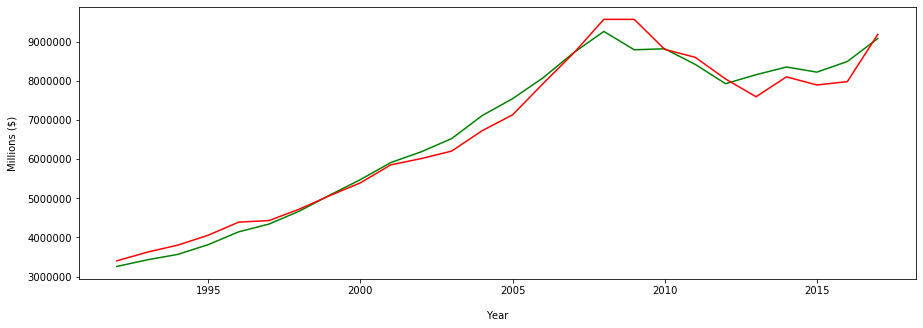

In [175]:
plt.figure(figsize=(15,5))

plt.plot(year_over_year.index, year_over_year.iloc[:,0], c='g')
plt.plot(year_over_year.index, year_over_year.iloc[:,1], c='r')

plt.xlabel("Year", labelpad=15)
plt.ylabel("Millions ($)", labelpad=10);

# why is it so difficult to format?

# ax.get_yaxis().set_major_formatter(
#     matplotlib.ticker.FuncFormatter(lambda x, p: '$%1.1f' % (x*1e-6)))

# ax.xaxis().set_major_locator(matplotlib.ticker.MultipleLocator(1))

# ax.yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))

Analysis: The real estate industry in Arizona was hit especially hard by the collapse of the housing bubble in 2007/2008.  The above graph shows the sharp decline in education revenue and spending in the years following the collapse.  Revenue and expenditures have only recently risen to pre-housing bubble levels.  I suspected that I might see a more significant dip in the years following the dot com bubble at the turn of the millenium, however, at the time of the bubble Arizona had very little dot com industry to be impacted.

### 3. In your chosen state, which of the lessons are the students more successful, math or reading?

In [114]:
# filter for only Arizona
education_df.loc[education_df.STATE == 'ARIZONA'].iloc[:,[-2, -1]].head()

,AVG_READING_4_SCORE,AVG_READING_8_SCORE
2,206,262
54,219,264
106,219,264
159,219,264
211,207,263


In [108]:
# compute the mean reading scores between 4th and 8th grades
education_df.loc[education_df.STATE == 'ARIZONA'].iloc[:,[-2,-1]].head().mean(axis=1)

2     234
54    241
106   241
159   241
211   235
dtype: float64

In [111]:
# compute mean for all years
education_df.loc[education_df.STATE == 'ARIZONA'].iloc[:,[-2,-1]].mean(axis=1).mean()

239.426845189009

In [110]:
# similar to the above, apply to math scores
# filter to only AZ
# select math scores
# compute mean
education_df.loc[education_df.STATE == 'ARIZONA'].iloc[:,[-4,-3]].mean(axis=1).mean()

254.68720746368567

Students in Arizona seem to be doing better at math than reading.

### Graph math and english scores to compare over time

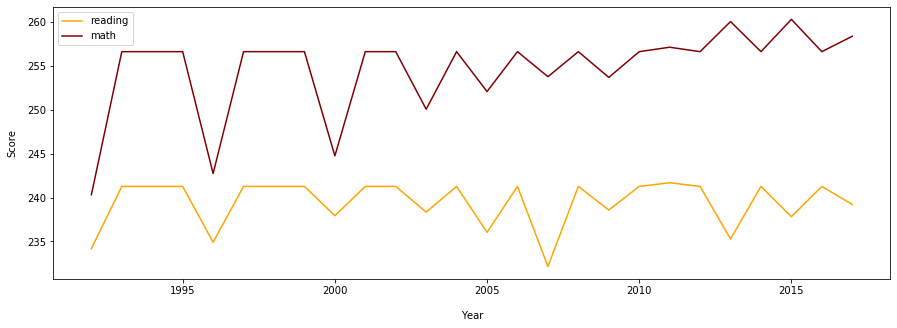

In [133]:
plt.figure(figsize=(15,5))

year = education_df.loc[education_df.STATE == 'ARIZONA'].iloc[:,[2]]
reading = education_df.loc[education_df.STATE == 'ARIZONA'].iloc[:,[-2,-1]].mean(axis=1)
math = education_df.loc[education_df.STATE == 'ARIZONA'].iloc[:,[-4,-3]].mean(axis=1)

plt.plot(year, reading, c='orange', label='reading')
plt.plot(year, math, c='maroon', label='math')
plt.legend()

plt.xlabel("Year", labelpad=15)
plt.ylabel("Score", labelpad=10);


Why do the scores seem to rise to a ceiling?  Especially so for the 90s?  However, for the last 7 years or so math has risen above that ceiling.  Also, earlier years seem to move very predictably in lockstep, with math having a larger up and down than english.

### 4. What are the distributions of the math and reading scores in the sample?

In [137]:
# compute the mean reading scores between 4th and 8th grades
# for all states
education_df.iloc[:,[-2,-1]].mean(axis=1)

0      236
1      239
2      234
3      237
4      230
        ..
1487   251
1488   245
1489   244
1490   239
1491   248
Length: 1492, dtype: float64

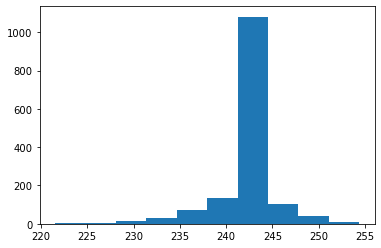

In [144]:
plt.hist(education_df.iloc[:,[-2,-1]].mean(axis=1));

In [138]:
# compute the mean math scores between 4th and 8th grades
# for all states
education_df.iloc[:,[-4,-3]].mean(axis=1)

0      230
1      257
2      240
3      233
4      235
        ..
1487   269
1488   265
1489   255
1490   264
1491   268
Length: 1492, dtype: float64

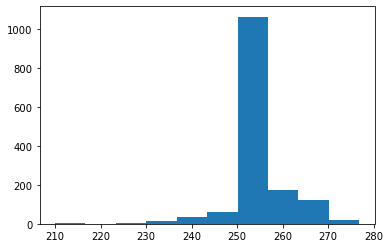

In [145]:
plt.hist(education_df.iloc[:,[-4,-3]].mean(axis=1));

Both of the distributions appear to be normal.

### 5. Notice there are too many missing values for math and reading scores. Fill out the missing values using mean, median, and linear interpolation. Then compare the effects of these techniques on the distributions of the score variables.

#### <font color=darkorange>I'm a little confused, the instructions at the very beginning of the assignment say "You're supposed to provide your answers to the following questions after you handled the missing values." But this question seems to indicate the prior analysis should take place without having removed the outliers.</font>

In [146]:
# re-import US education data
# to be able to do analysis comparing and contrasting
# different methods of filling nan values
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

education_df2 = pd.read_sql_query('select * from useducation',con=engine)

# no need for an open connection, 
# as we're only doing a single query
engine.dispose()

In [147]:
education_df3 = education_df2.copy()

In [173]:
# above with education_df, I filled missing values using mean

In [149]:
# fill in nan values using median
for col in education_df2.columns[3:]:
    education_df2.loc[:, col] = education_df2.loc[:, col].fillna(education_df2.loc[:, col].median())

In [148]:
# fill in nan values using interpolate
for col in education_df3.columns[3:]:
    education_df3.loc[:, col] = education_df3.loc[:, col].fillna(education_df3.loc[:, col].interpolate())

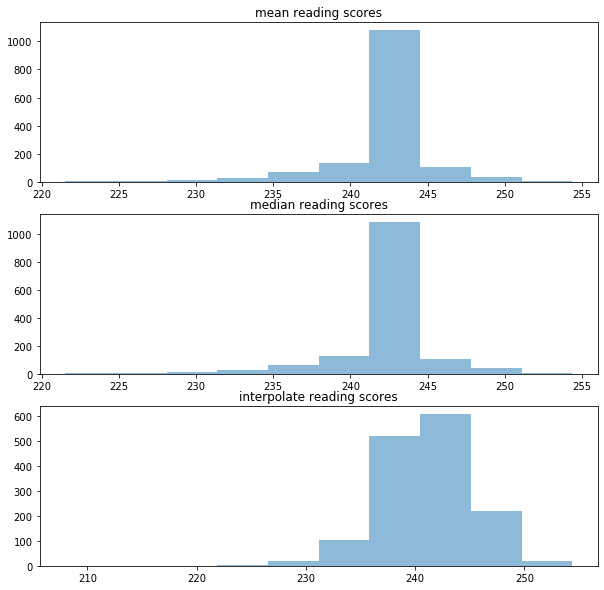

In [170]:
# visualize reading score differences
# with fill na using mean, median, and interpolate
fig = plt.figure(figsize=(10,10))
df_list = [education_df,
          education_df2,
          education_df3]

title = {1:'mean reading scores',
        2:'median reading scores',
        3:'interpolate reading scores'}

for i, df in enumerate(df_list):

    plt.subplot(3, 1, i+1)
    plt.title(title[i+1])
    plt.hist(df.iloc[:,[-2,-1]].mean(axis=1), alpha=.5);


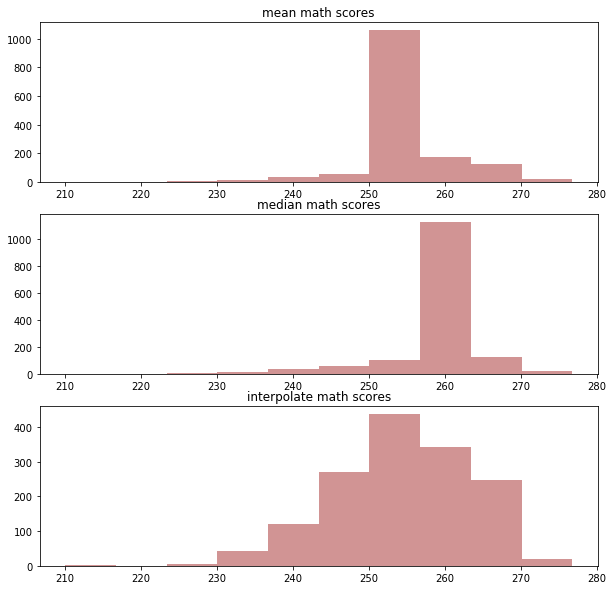

In [174]:
# visualize math score differences
# with fill na using mean, median, and interpolate
fig = plt.figure(figsize=(10,10))
df_list = [education_df,
          education_df2,
          education_df3]

title = {1:'mean math scores',
        2:'median math scores',
        3:'interpolate math scores'}

for i, df in enumerate(df_list):

    plt.subplot(3, 1, i+1)
    plt.title(title[i+1])
    plt.hist(df.iloc[:,[-4,-3]].mean(axis=1), alpha=.5, color='brown');